In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Our Portfolio
This portfolio will be composed of 30% Global Equity Composite, 40% US Large Cap Composite, and 30% US Small Cap Composite.<br>
If we have a portfolio of 1000 dollars, we will have 300 dollars Global Equity Composite, 400 dollars US Large Cap Composite, and 300 dollars US Small Cap Composite.

In [2]:
portfolio = pd.read_excel("Intern_Portfolio_Task.xlsx", sheet_name=1)
print(portfolio.head())

  Unnamed: 0  SPXT Index  Global Equity Composite  US Large Cap Composite  \
0 2018-10-31   -6.835004                -8.234011                 -8.8293   
1 2018-11-30    2.037810                 1.424678                  1.6768   
2 2018-12-31   -9.028986                -7.688047                 -9.7482   
3 2019-01-31    8.013491                 8.359417                  9.9469   
4 2019-02-28    3.210845                 2.719120                  2.7959   

   US Small Cap Composite  
0                 -9.9174  
1                 -0.7973  
2                -11.3766  
3                 11.9195  
4                  4.6644  


# Note
We see that the first column is unnamed.
Let's fix that.

In [3]:
portfolio.rename({'Unnamed: 0': 'Date'}, axis=1, inplace=True)
print(portfolio.head())

        Date  SPXT Index  Global Equity Composite  US Large Cap Composite  \
0 2018-10-31   -6.835004                -8.234011                 -8.8293   
1 2018-11-30    2.037810                 1.424678                  1.6768   
2 2018-12-31   -9.028986                -7.688047                 -9.7482   
3 2019-01-31    8.013491                 8.359417                  9.9469   
4 2019-02-28    3.210845                 2.719120                  2.7959   

   US Small Cap Composite  
0                 -9.9174  
1                 -0.7973  
2                -11.3766  
3                 11.9195  
4                  4.6644  


Let's check the data types to make sure that we can properly perform analysis.

In [4]:
print(portfolio.dtypes)

Date                       datetime64[ns]
SPXT Index                        float64
Global Equity Composite           float64
US Large Cap Composite            float64
US Small Cap Composite            float64
dtype: object


Everything looks good. Let's start.

Let's calculate beta.
Let's make a helper method to calculate beta.

In [5]:
def beta(e, m):
    covariance = np.cov(e, m)[0][1]
    variance   = np.var(m)
    return covariance / variance

Calculate beta:

In [6]:
portfolio_beta = beta(portfolio["Global Equity Composite"], portfolio["SPXT Index"]) * 0.3 + beta(portfolio["US Large Cap Composite"], portfolio["SPXT Index"]) * 0.4 + beta(portfolio["US Small Cap Composite"], portfolio["SPXT Index"]) * 0.3
print("Our portfolio beta is", portfolio_beta)

Our portfolio beta is 1.1720322738280262


# Analysis
Since our beta is just above 1 our stock will move slightly more than the market. This means greater losses when the market moves down, but it means greater gains when the market moves up.

# Let's calculate VaR

Let's make a list containing the monthly gains and losses of our portfolio.

In [7]:
returns = []
for data in portfolio["Global Equity Composite"]:
    returns.append(data * 0.3)
for data in portfolio["US Large Cap Composite"]:
    returns.append(data * 0.4)
for data in portfolio["US Small Cap Composite"]:
    returns.append(data * 0.3)

Use the quantile function to show the VaR

In [8]:
var = np.quantile(returns, 0.05)
print("The VaR of our portfolio is", var)

The VaR of our portfolio is -3.4381350000000004


# Analysis
This means that 95% of the time, we will not see losses greater than -3.4381% a month. <br>
Plot VaR to better visualize what this looks like.

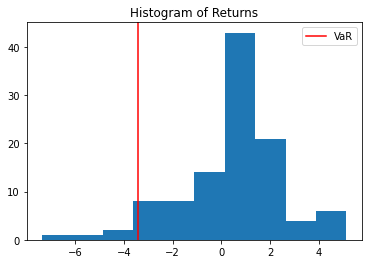

In [9]:
plt.hist(returns)
plt.title("Histogram of Returns")
plt.axvline(x=var, color='red', label='VaR')
plt.legend()
plt.show()